### Objective: predict if the customer will purchase an iPhone or not given their gender, age and salary.

### Import Packages

In [266]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import sklearn.metrics as metrics
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
pd.options.display.max_columns = 1000
from sklearn.model_selection import RandomizedSearchCV

### Import Data

In [267]:
phone = pd.read_csv('C:/Users/Joy/Desktop/iphone_purchase_records.csv')
phone.head()

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [268]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 
 3   Purchase Iphone  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [269]:
def gender (series):
    if series =="Male":
        return 0
    if series == "Female":
        return 1
phone['GenderR'] = phone['Gender'].apply(gender)

In [270]:
phone.head()

,Gender,Age,Salary,Purchase Iphone,GenderR
0,Male,19,19000,0,0
1,Male,35,20000,0,0
2,Female,26,43000,0,1
3,Female,27,57000,0,1
4,Male,19,76000,0,0


In [271]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 
 3   Purchase Iphone  400 non-null    int64 
 4   GenderR          400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


### Drop Missing and NA Values

In [272]:
phone.dropna(inplace=True)
phoneTrimmed = phone.drop(['Gender'], axis=1)

In [273]:
phoneTrimmed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   Salary           400 non-null    int64
 2   Purchase Iphone  400 non-null    int64
 3   GenderR          400 non-null    int64
dtypes: int64(4)
memory usage: 15.6 KB


### Data Wrangling

In [274]:
phoneTrimmed['GenderR'].value_counts()

1    204
0    196
Name: GenderR, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Salary'>

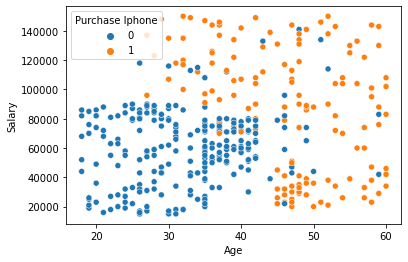

In [275]:
sns.scatterplot(x='Age', y='Salary', hue='Purchase Iphone', data=phoneTrimmed)

In [276]:
X = phoneTrimmed[['GenderR', 'Age', 'Salary']]
y = phoneTrimmed['Purchase Iphone']

In [277]:
X.head()

,GenderR,Age,Salary
0,0,19,19000
1,0,35,20000
2,1,26,43000
3,1,27,57000
4,0,19,76000


In [278]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchase Iphone, dtype: int64

### Train Test Split

In [279]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [281]:
X_train

,GenderR,Age,Salary
250,1,44,39000
63,0,32,120000
312,1,38,50000
159,1,32,135000
283,1,52,21000
...,...,...,...
323,1,48,30000
192,0,29,43000
117,0,36,52000
47,1,27,54000


In [282]:
y_train

250    0
63     1
312    0
159    1
283    1
      ..
323    1
192    0
117    0
47     0
172    0
Name: Purchase Iphone, Length: 300, dtype: int64

### Create the Initial Decision Tree

In [292]:
decisionTree = DecisionTreeClassifier()
decisionTree.fit(X_train, y_train)

DecisionTreeClassifier()

In [293]:
treePredictions = decisionTree.predict(X_test)
print(confusion_matrix(y_test, treePredictions))

[[63  5]
 [ 4 28]]


In [294]:
print(accuracy_score(y_test, decisionTree.predict(X_test)))

0.91


In [285]:
print (classification_report(y_test, treePredictions))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93        68
           1       0.85      0.88      0.86        32

    accuracy                           0.91       100
   macro avg       0.89      0.90      0.90       100
weighted avg       0.91      0.91      0.91       100



### Accuracy score: 90%
Precision score: 0.94

### Create the Initial Random Forest Model

In [286]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier()

In [287]:
forestPredictions = forest.predict(X_test)
print(confusion_matrix(y_test, forestPredictions))

[[64  4]
 [ 4 28]]


In [288]:
print(accuracy_score(y_test, forest.predict(X_test)))

0.92


In [289]:
print(classification_report(y_test, forest.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        68
           1       0.88      0.88      0.88        32

    accuracy                           0.92       100
   macro avg       0.91      0.91      0.91       100
weighted avg       0.92      0.92      0.92       100



### Accuracy score: 92%

### Let's Predict some data on our model

In [225]:
m1 = std.transform([[1,31,89000]])
lr.predict(m1)

array([0], dtype=int64)

Prediction is 0. The gender is female, age is 31 
and salary is $89,000. They don't purchase the iPhone.
Our predicted value is 0 and actual value is 0.
Our model is working perfectly for this data.

In [162]:
m2 = std.transform([[0,35,75000]])
lr.predict(m2)

array([0], dtype=int64)

Prediction is 0. The gender is male, age is 35 and salary is $75,000. 
They don't purchase the iPhone.
Our predicted value is 0 and actual value is 0. 

In [164]:
m3=std.transform([[0,46,79000]])
lr.predict(m3)

array([1], dtype=int64)

Prediction is 1. The gender is male, age is 46 and salary is 79,000> They purchase the iPhone.

Our predicted value is 1 and actual value is 1. Our model is working perfectly for this data.

In [295]:
m4=std.transform([[1,46,96000]])
lr.predict(m4)

array([1], dtype=int64)

Prediction is 0. The gender is female, age is 46 and salary is $96,000. They purchase the iPhone.

Our predicted value is 0 and actual value is 1. Our model did not work perfectly for this data.